### Principal Component Analysis

This notebook is to describe PCA application in risk application.  
Introduce in 1901 by Karl Pearson is te oldest known technique of multivariate analysis.

The central idea of PCA is to reduce the dimensiality of a data set consisting of interrelated variables. It is done so by transforming them into the new set of variables also called Principal Components PC.

#### Definition

Given vecotr **x** of _p_ random variables 

<cite data-cite="jolliffe2002principal"></cite>.


In Python PCA is done by a popular _scikit-learn_ library.
Let's start off with loading necessary libraries.
The 'fredapi' library woulad allow to access data from Federal Reserve Economic Data's database.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from fredapi import Fred

In [ ]:
#For this exercise I'll use United States' Treasury Constant Maturity Market Yields. No transformation applied.
api_key = "28e374e86bb0a81107a9352a5cfceb9b"
fred = Fred(api_key=api_key)

#Standard approach of creating dictionary instad of dynamic variable name applied.
data_dict = {}
for i in [1,2,3,5,7,10,20,30]:
    symbol = f"GS{i}"
    data_dict[symbol] = fred.get_series(symbol, 
                         observation_start = '2000-01-01',
                         observation_end = '2024-12-31',
                         frequency ='m')
    
for i in [3,6]:
    symbol = f"DGS{i}MO"
    data_dict[symbol] = fred.get_series(symbol, 
                         observation_start = '2000-01-01',
                         observation_end = '2024-12-31',
                         frequency ='m')

data = pd.DataFrame(data_dict)
data_index = data.index.tolist()

             GS1   GS2   GS3   GS5   GS7  GS10  GS20  GS30  DGS3MO  DGS6MO
2000-01-01  6.12  6.44  6.49  6.58  6.70  6.66  6.86  6.63    5.50    5.76
2000-02-01  6.22  6.61  6.65  6.68  6.72  6.52  6.54  6.23    5.73    6.00
2000-03-01  6.22  6.53  6.53  6.50  6.51  6.26  6.38  6.05    5.86    6.11
2000-04-01  6.15  6.40  6.36  6.26  6.27  5.99  6.18  5.85    5.82    6.07
2000-05-01  6.33  6.81  6.77  6.69  6.69  6.44  6.55  6.15    5.99    6.39
...          ...   ...   ...   ...   ...   ...   ...   ...     ...     ...
2024-08-01  4.43  3.97  3.79  3.71  3.77  3.87  4.25  4.15    5.30    4.96
2024-09-01  4.03  3.62  3.51  3.50  3.60  3.72  4.10  4.04    4.92    4.55
2024-10-01  4.20  3.97  3.90  3.91  3.99  4.10  4.44  4.38    4.72    4.44
2024-11-01  4.33  4.26  4.21  4.23  4.29  4.36  4.63  4.54    4.62    4.43
2024-12-01  4.23  4.23  4.22  4.25  4.32  4.39  4.66  4.58    4.39    4.32

[300 rows x 10 columns]


pandas.core.frame.DataFrame

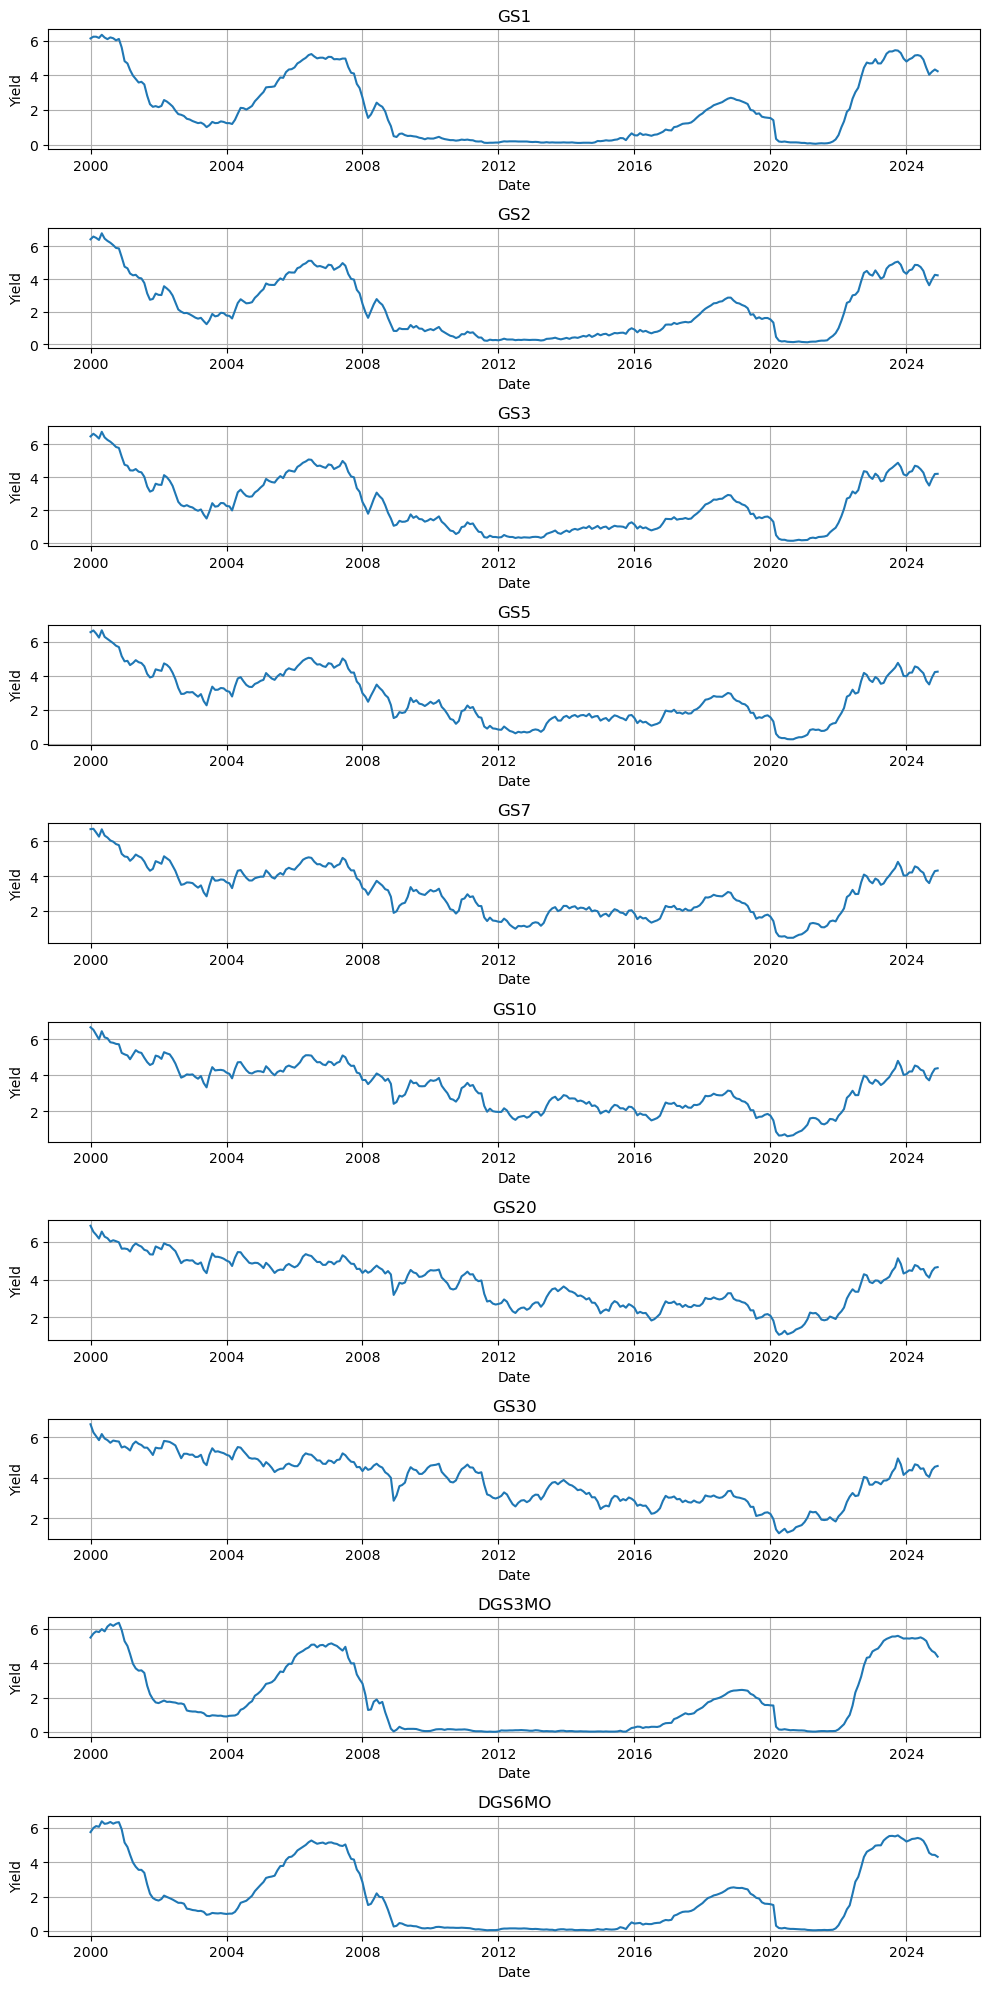

In [19]:
# Get the number of columns in your DataFrame
num_plots = len(data.columns)

# Create subplots with one row and as many columns as you have in 'data'
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 2 * num_plots))  # Adjust height for visibility

# Loop through each column and plot
#Each iteration returns a column name (col_name) and a Series (data).
#This overwrites the original data DataFrame with a Series inside the loop.
for idx, (col_name, data) in enumerate(data.items()):
    axes[idx].plot(data.index, data)  # Plot the column data
    axes[idx].set_title(col_name)  # Set title as the column name
    axes[idx].set_xlabel('Date')  # Label for X-axis
    axes[idx].set_ylabel('Yield')  # Label for Y-axis
    axes[idx].grid(True)  # Enable grid

#recreating original dataset
data = pd.DataFrame(data_dict)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
scaled_data = preprocessing.scale(data,axis=0)
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

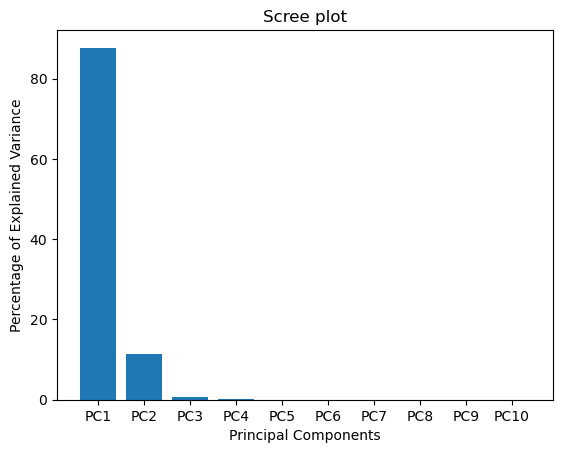

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree plot')
plt.show()

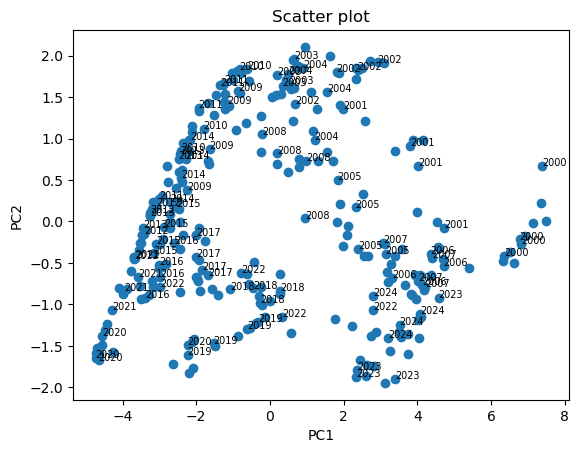

In [76]:
pca_df = pd.DataFrame(pca_data, index=data_index, columns=labels)

plt.scatter(pca_df['PC1'].to_numpy(), pca_df['PC2'].to_numpy())
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

for i, sample in enumerate(pca_df.index):
    if i % 3 == 0:
        plt.annotate(sample.year, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]), fontsize=7)
plt.show()